In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import json

In [2]:
path_reports = "../reports/"

In [3]:
columns = ["Model name", "Accuracy", "Data noise"]
data = list()
pathlist = Path(path_reports).glob('**/accuracies.json')
for path in pathlist:
     if 'Feedback_4block_to_1block_10_epochs' not in str(path):
        path_in_str = str(path)
        model_name = '-'.join(path_in_str.split('/')[2:-1])
        #print(path_in_str.split('/'))
        print(model_name)
        with open(path_in_str) as json_file:
            accuracies = json.load(json_file)
            for acc, noise in zip([accuracies['test_acc_original_data'],
                                accuracies['test_acc_gaussian_noise'],
                                accuracies['test_acc_salt_pepper_noise']],
                               ["without_noise", "gaussian_noise", "salt_pepper_noise"]):
                data.append([model_name, round(acc,2), noise])

frozenVGG16-Feedback_5block_to_3block_3_projection_layers
frozenVGG16-Feedback_5block_to_3block
frozenVGG16-Feedback_4block_to_1block_2_projection_layers
frozenVGG16-Feedback_4block_to_4block
frozenVGG16-Forward_5_4_3_blocks_not_frozen
frozenVGG16-Feedback_5block_to_3block_2_projection_layers
frozenVGG16-Feedback_4block_to_1block
frozenVGG16-Feedback_5block_to_4block
frozenVGG16-Forward
frozenVGG16-Forward_5block_not_frozen
frozenVGG16-Forward_5_4_blocks_not_frozen
frozenVGG16-Feedback_5block_to_5block
frozenVGG16-Feedback_4block_to_1block_1_projection_layers
notFrozenVGG16-VGG16Feedback 4Block To 1Block
notFrozenVGG16-VGG16Feedback 4Block To 4Block
notFrozenVGG16-VGG16Forward
frozenVGG16TrainGaussianNoise-Feedback_5block_to_3block
frozenVGG16TrainGaussianNoise-Feedback_4block_to_4block
frozenVGG16TrainGaussianNoise-Forward_5_4_3_blocks_not_frozen
frozenVGG16TrainGaussianNoise-Feedback_4block_to_1block
frozenVGG16TrainGaussianNoise-Forward
frozenVGG16TrainGaussianNoise-Forward_5block_n

In [4]:
def show_values_on_bar_plot(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.3f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.3f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

def plot_bar_plot(df, title='Test accuracies', mode="v", figsize=(20,10)):
    sns.set(rc={
                "grid.color": "grey",
                "grid.linestyle": ":",
                "figure.figsize":(10,6),
                "axes.labelsize":15,
                "axes.titlesize":20})
    fig, ax = plt.subplots(figsize=figsize)
    palette ={"gaussian_noise": "C0", "without_noise": "C1", "salt_pepper_noise": "C2"}
    #unique = df["Model name"].unique()
    #palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
    splot = sns.barplot(data=df, y="Accuracy", x="Model name", hue="Data noise", palette=palette)
    splot.set(title=title)
    plt.legend(loc='lower right')
    show_values_on_bar_plot(splot, mode, space=0)

In [5]:
training_res = pd.DataFrame(data, columns=columns).sort_values(by='Model name', ascending=True)

# Block 4 to 1

In [45]:
df_4_to_1 = training_res.copy()

In [46]:
val_contains = "frozenVGG16-Feedback_4block_to_1block"
df_4_to_1 = df_4_to_1[df_4_to_1["Model name"].str.contains(val_contains)]
df_4_to_1["Model name"] = df_4_to_1['Model name']\
                                .str.replace("frozenVGG16-Feedback_4block_to_1block_1_projection_layers", "Feedback4To1-1ConvProj")\
                                .str.replace("frozenVGG16-Feedback_4block_to_1block_2_projection_layers", "Feedback4To1-2ConvProj")\
                                .str.replace("frozenVGG16-Feedback_4block_to_1block", "Feedback4To1-3ConvProj")

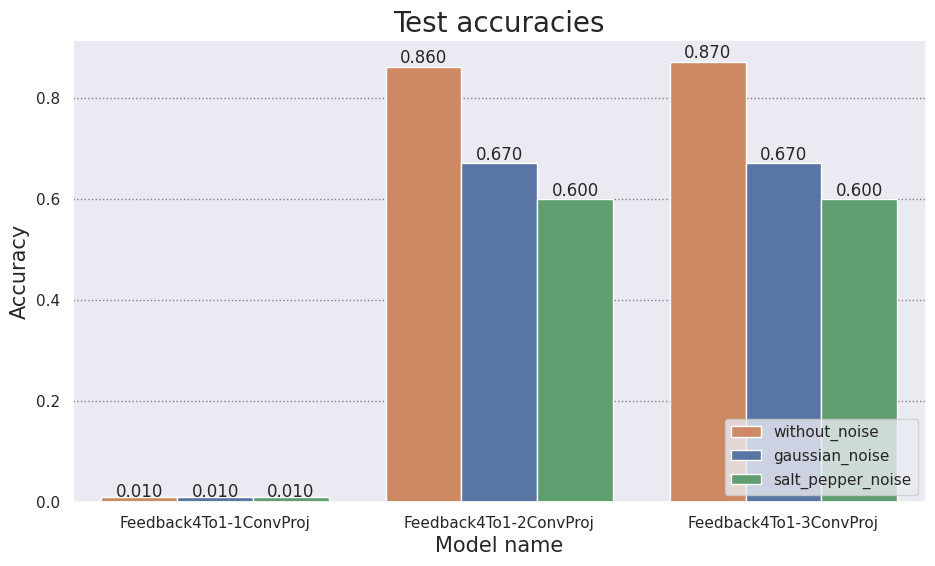

In [47]:
plot_bar_plot(df_4_to_1.sort_values(by="Model name", ascending=True), figsize=(11, 6))

# Block 3 to 5

In [42]:
df_5_to_3 = training_res.copy()

In [43]:
val_contains = "frozenVGG16-Feedback_5block_to_3block"
df_5_to_3 = df_5_to_3[df_5_to_3["Model name"].str.contains(val_contains)]
df_5_to_3["Model name"] = df_5_to_3['Model name']\
                                .str.replace("frozenVGG16-Feedback_5block_to_3block_3_projection_layers", "Feedback5To3-3ConvProj")\
                                .str.replace("frozenVGG16-Feedback_5block_to_3block_2_projection_layers", "Feedback5To3-2ConvProj")\
                                .str.replace("frozenVGG16-Feedback_5block_to_3block", "Feedback5To3-1ConvProj")

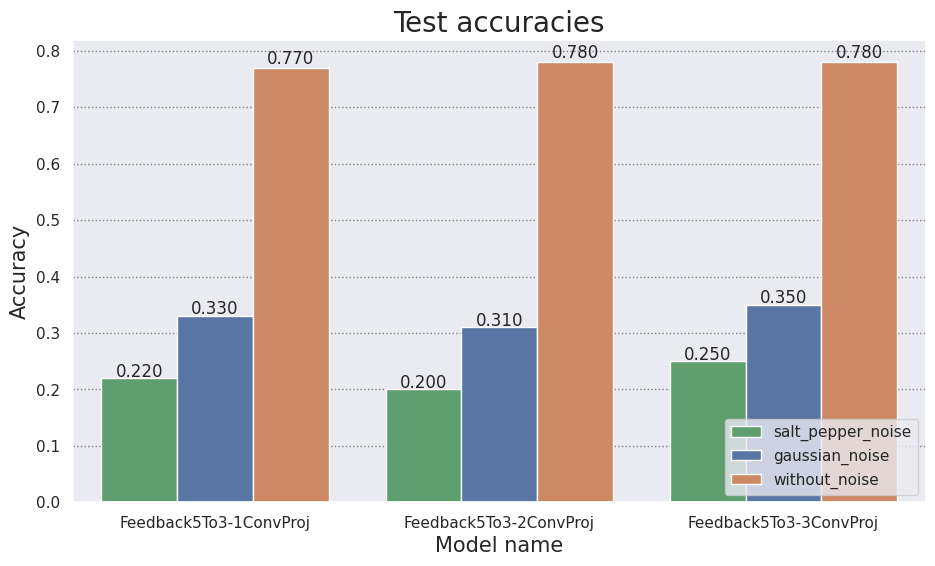

In [44]:
plot_bar_plot(df_5_to_3.sort_values(by="Model name", ascending=True), figsize=(11, 6))